In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

## 1. Realizar un an√°lisis exploratorio de los datos para identificar relaciones entre variables, valores at√≠picos, tendencias, etc. üîç

In [97]:
#importo el dataset
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head(10)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72

In [99]:
#Descripci√≥n
dataset.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Text(0.5, 1.0, 'Identificaci√≥n de Datos Faltantes y At√≠picos')

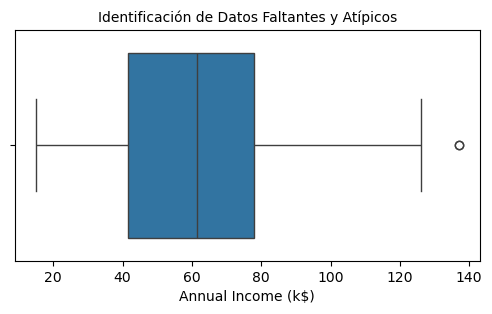

In [101]:
#identifico datos faltantes 

plt.figure(figsize=(6, 3))
sns.boxplot(x=dataset['Annual Income (k$)'])
plt.title('Identificaci√≥n de Datos Faltantes y At√≠picos', fontsize=10 )

## 2. Preprocesar los datos limpi√°ndolos, tratando valores faltantes y transform√°ndolos seg√∫n sea necesario. ‚öôÔ∏è

In [103]:
# reviso datos faltantes
print("Cantidad de Registros con cero en Edad: ",dataset['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Ingresos Anuales: ",dataset['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Puntuaci√≥n de gastos: ",dataset['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Ingresos Anuales:  0
Cantidad de Registros con cero en Puntuaci√≥n de gastos:  0


In [105]:
# Reemplazar todos los ceros con el valor medio
count_zeros = (dataset['Annual Income (k$)'] == 0).sum()

# Reemplazar los valores de 0 por la media
dataset['Annual Income (k$)']= dataset['Annual Income (k$)'].replace(0,dataset['Annual Income (k$)'].mean())

# Imprimir el n√∫mero de valores modificados
print(f"Se cambiaron {count_zeros} valores.")

Se cambiaron 0 valores.


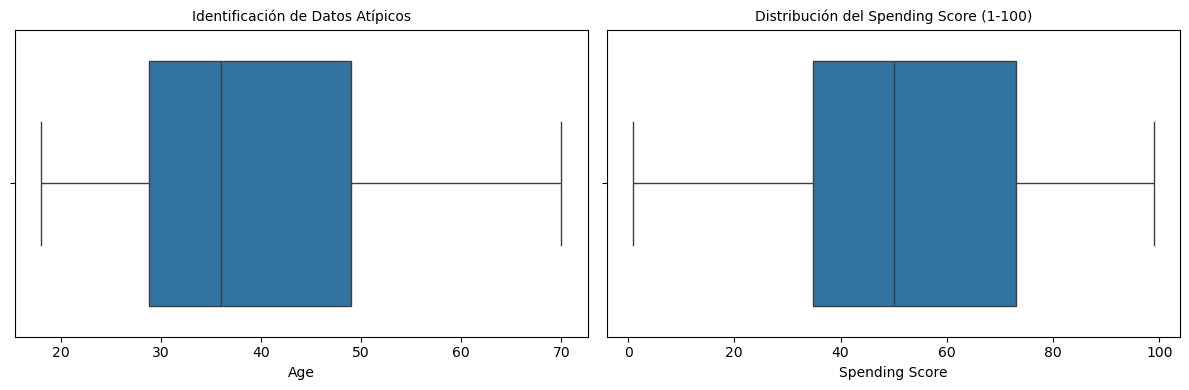

In [107]:
#Identifico los datos At√≠picos Age

fig, axes = plt.subplots(1, 2, figsize=(12, 4))  


sns.boxplot(x=dataset['Age'], ax=axes[0])
axes[0].set_title('Identificaci√≥n de Datos At√≠picos', fontsize=10)
axes[0].set_xlabel('Age')


sns.boxplot(x=dataset['Spending Score (1-100)'], ax=axes[1])
axes[1].set_title('Distribuci√≥n del Spending Score (1-100)', fontsize=10)
axes[1].set_xlabel('Spending Score')


plt.tight_layout()
plt.show()



In [109]:
#Conteo de Datos At√≠picos 

#Age
nivel_minimo=18
nivel_maximo=70
Total_Atipicos=((dataset['Age']<nivel_minimo)|
                (dataset['Age']>nivel_maximo)).sum()
print("El total de datos at√≠picos es {}".format(Total_Atipicos))

# Spending Score
nivel_minimo = 0
nivel_maximo = 100
Total_Atipicos_Spending = ((dataset['Spending Score (1-100)'] < nivel_minimo) | 
                           (dataset['Spending Score (1-100)'] > nivel_maximo)).sum()

print("El total de datos at√≠picos en Spending Score es {}".format(Total_Atipicos_Spending))


El total de datos at√≠picos es 0
El total de datos at√≠picos en Spending Score es 0


In [62]:
# reiviso los datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 3. Seleccionar las caracter√≠sticas m√°s relevantes para entrenar el modelo utilizando selecci√≥n de caracter√≠sticas. üì§üì•

Caracter√≠sticas de interes para el agrupamiento:
- Age
- Annual Income (k$)	
- Spending Score (1-100)

In [113]:
# Filtro columnas del modelo 

print("Total de filas en el dataset:", dataset.shape[0])
dataset = dataset[["Age", "Annual Income (k$)","Spending Score (1-100)"]]
dataset.head(10)

Total de filas en el dataset: 200


Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40
5   22                  17                      76
6   35                  18                       6
7   23                  18                      94
8   64                  19                       3
9   30                  19                      72

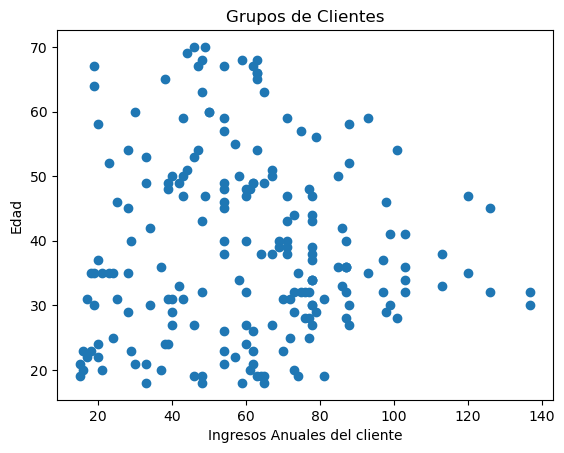

In [117]:
# Grafica antes del agrupamiento

plt.scatter(dataset['Annual Income (k$)'], dataset['Age'])
plt.xlabel('Ingresos Anuales del cliente')
plt.ylabel('Edad')
plt.title('Grupos de Clientes')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperpar√°metros. ü™ñ

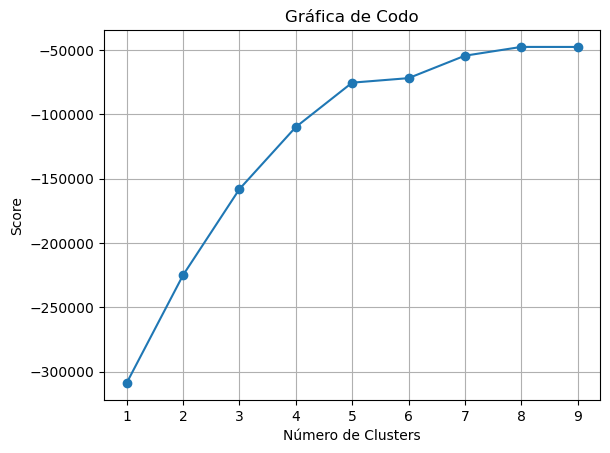

In [130]:
# gr√°fica de Codo de Jamb√∫

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(dataset).score(dataset) for i in range(len(kmeans))]

plt.plot(Nc, score, marker='o')
plt.xlabel('N√∫mero de Clusters')
plt.ylabel('Score')
plt.title('Gr√°fica de Codo')
plt.grid(True)
plt.show()

In [134]:
# Generaci√≥n del modelo de Agrupamiento

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(dataset)

KMeans(n_clusters=5, random_state=0)

In [140]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
dataset["Grupo"] = Modelo.labels_ 
print (dataset)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      2
1     21                  15                      81      2
2     20                  16                       6      0
3     23                  16                      77      2
4     31                  17                      40      0
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


## 5. Evaluar el desempe√±o del modelo con m√©tricas como Coeficiente de Silhouette, √çndice de Calinski-Harabasz, etc üìà

In [150]:
# Desempe√±o del modelo

# Preparaci√≥n de la metrica de la columna Grupo
Observaciones = len(dataset)
X = dataset.drop('Grupo', axis=1)
clusters = dataset['Grupo']

# Se calculan las m√©tricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las m√©tricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.3771108731967625 |
| Indice Calinski Harabasz | 133.49030043802063 |
|  Indice Davies Bouldin   | 0.9845471043038023 |
+--------------------------+--------------------+


## 6. Realizar las diferentes gr√°ficas que permitan visualizar los resultados del modelo üñåÔ∏è

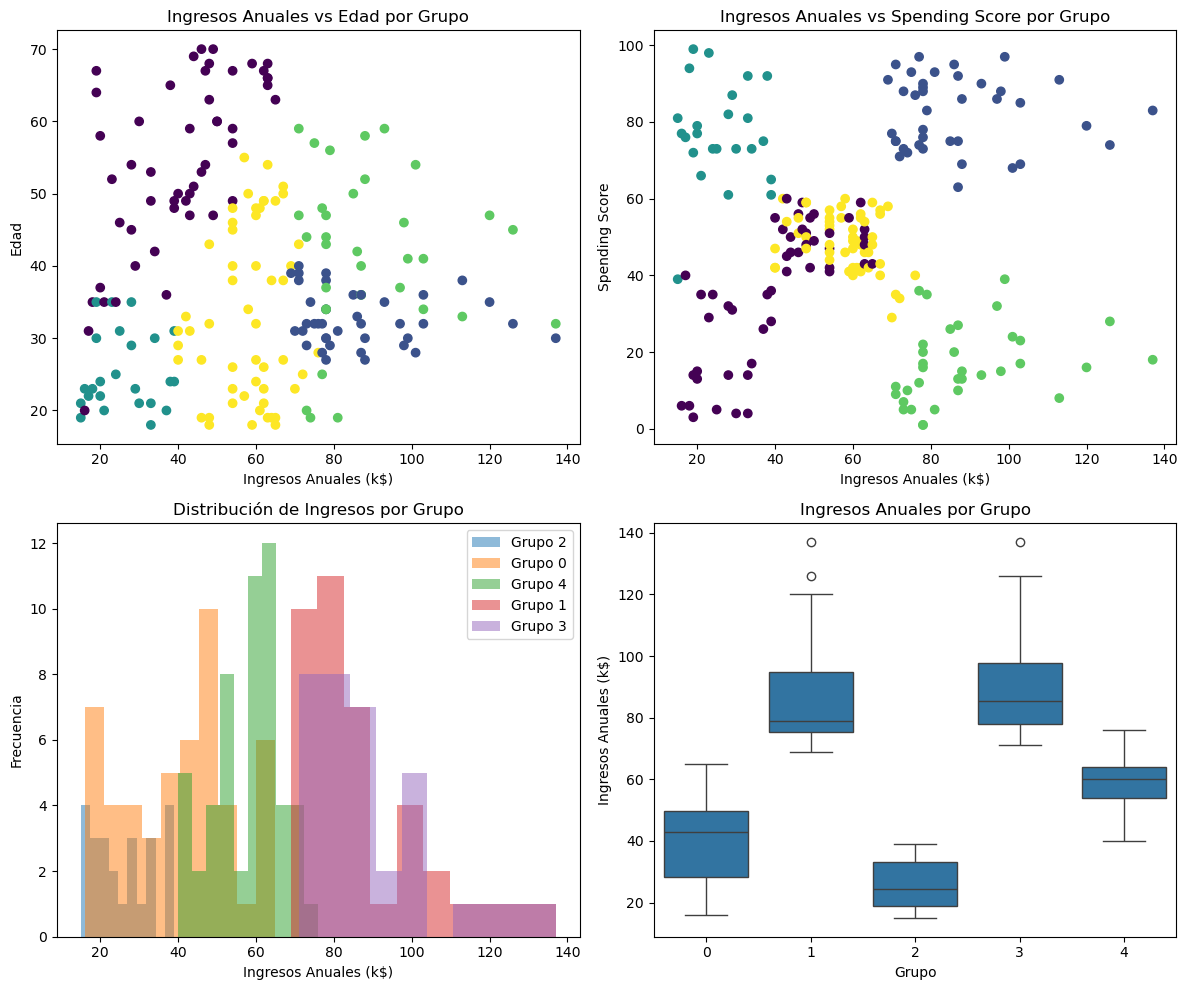

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].scatter(dataset['Annual Income (k$)'], dataset['Age'], c=dataset['Grupo'], cmap='viridis')
axes[0, 0].set_title('Ingresos Anuales vs Edad por Grupo')
axes[0, 0].set_xlabel('Ingresos Anuales (k$)')
axes[0, 0].set_ylabel('Edad')

axes[0, 1].scatter(dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'], c=dataset['Grupo'], cmap='viridis')
axes[0, 1].set_title('Ingresos Anuales vs Spending Score por Grupo')
axes[0, 1].set_xlabel('Ingresos Anuales (k$)')
axes[0, 1].set_ylabel('Spending Score')

for grupo in dataset['Grupo'].unique():
    subset = dataset[dataset['Grupo'] == grupo]
    axes[1, 0].hist(subset['Annual Income (k$)'], bins=10, alpha=0.5, label=f'Grupo {grupo}')
axes[1, 0].set_title('Distribuci√≥n de Ingresos por Grupo')
axes[1, 0].set_xlabel('Ingresos Anuales (k$)')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].legend()

sns.boxplot(x='Grupo', y='Annual Income (k$)', data=dataset, ax=axes[1, 1])
axes[1, 1].set_title('Ingresos Anuales por Grupo')
axes[1, 1].set_xlabel('Grupo')
axes[1, 1].set_ylabel('Ingresos Anuales (k$)')

plt.tight_layout()
plt.show()


## 7. Interpretar, analizar y documentar los resultados obtenidos.

Coeficiente de Silhouette: La puntuaci√≥n de Silhouette obtenida es de aproximadamente 0.3771, lo que sugiere una separaci√≥n moderada entre los grupos. Aunque no se acerca al valor ideal de 1, que indicar√≠a una clara separaci√≥n, este valor indica que los grupos est√°n razonablemente diferenciados. En general, una puntuaci√≥n m√°s alta ser√≠a m√°s deseable, pero este valor nos se√±ala que el modelo ha logrado segmentar los datos de manera aceptable. Sin embargo, una mayor separaci√≥n podr√≠a ser alcanzada al ajustar par√°metros como el n√∫mero de clusters.

√çndice de Calinski-Harabasz: La puntuaci√≥n de 133.49 en el √≠ndice de Calinski-Harabasz es un buen indicativo de que los cl√∫steres est√°n relativamente bien definidos. Este √≠ndice mide la dispersi√≥n entre los grupos en relaci√≥n con la dispersi√≥n dentro de cada grupo, por lo que una puntuaci√≥n m√°s alta refleja una mayor separaci√≥n entre los cl√∫steres. Aunque ser√≠a ideal obtener un valor a√∫n mayor, la puntuaci√≥n actual indica que los grupos tienen una estructura coherente y bien diferenciada, lo que sugiere que el modelo ha logrado una segmentaci√≥n efectiva.

√çndice Davies-Bouldin: La puntuaci√≥n obtenida en el √≠ndice de Davies-Bouldin es 0.9845, lo que refleja un nivel moderado de separaci√≥n entre los grupos. Este √≠ndice mide la distancia entre los centros de los grupos en comparaci√≥n con la dispersi√≥n dentro de cada grupo, donde una puntuaci√≥n baja indica una mejor separaci√≥n. Con un valor cercano a 1, se puede inferir que la separaci√≥n entre los grupos es decente, aunque a√∫n existen algunas √°reas de superposici√≥n. Una puntuaci√≥n m√°s baja ser√≠a ideal, por lo que se podr√≠an realizar ajustes adicionales en el modelo para mejorar la segmentaci√≥n y reducir la similitud entre los grupos.